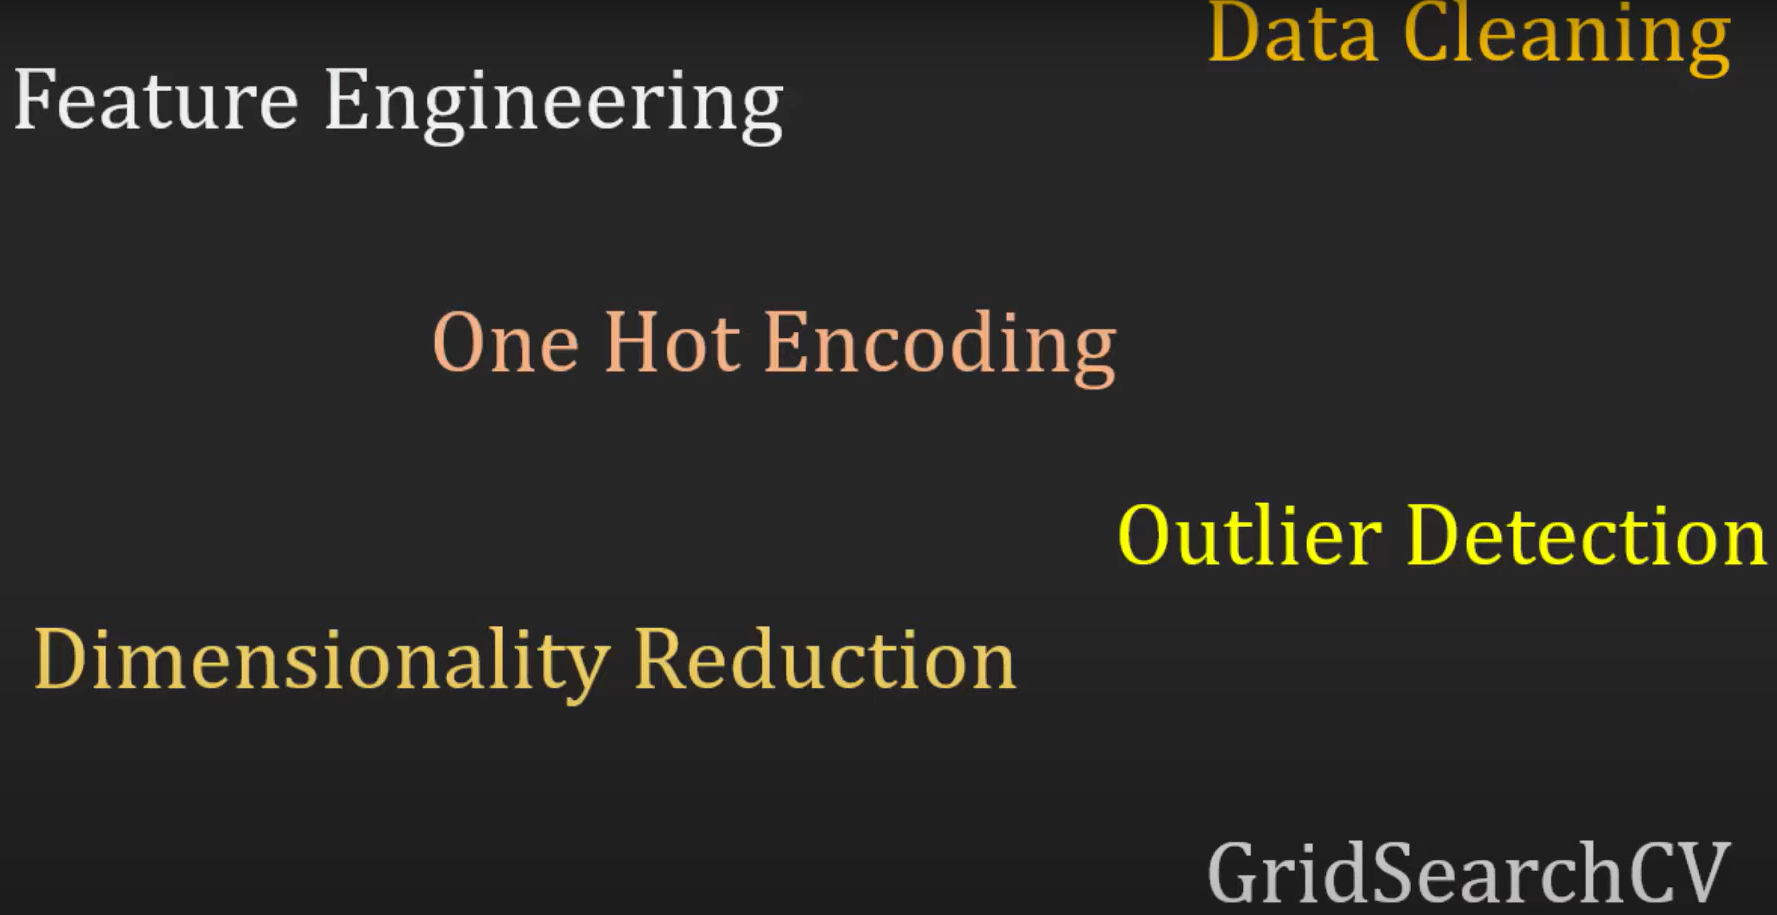

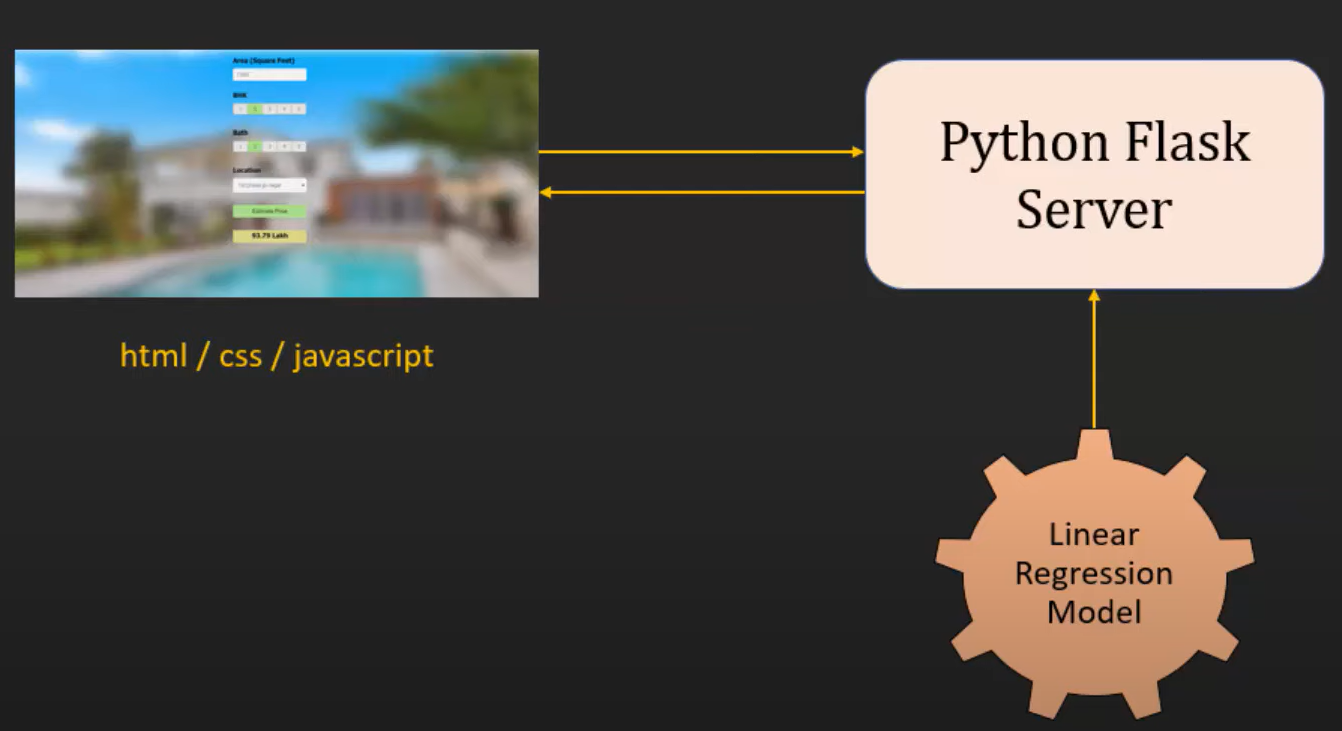

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib 
matplotlib.rcParams["figure.figsize"]=(20,10)
df=pd.read_csv("C:\\Users\\dell\\Desktop\\Dataset2\\bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
df.shape

(13320, 9)

In [3]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
# Examining area type feature
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Data Cleaning

In [5]:
# Assume availability is not important, so drop availability
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df1=df.drop(['area_type', 'availability','society','balcony'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
# To find number of rows where column value is na
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

 Total 73 rows where value of bathroom is not avialable
 
 Total 16 rows where size is not available
 

In [8]:
# Dropping the rows with na value
df1=df1.dropna()
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

We can replace na value with other statistics value


In [9]:
df1.shape

(13246, 5)

In [10]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df1['bhk']=df1['size'].apply(lambda x: int(x.split(' ')[0]))
# x will contain column value for each row,we will split the input string using space
# It wll give use 2 tokens like token1=2, token2=bhk, we want 1st token so index [0] is taken
# default ouput will be string so we have converted it to int
df1

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [12]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df1[df1.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


Above records looks like an error, we cann't have 43 bedrooms in 2400 sqft

In [15]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

at some palces we are provided with range like 1133-1384, we have to convert them to number


One way is take average of numbers


In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


We will be treating values given in range by replacing with their average value, and will be ignoring the rown with the unit values like perch,sq mt

In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
convert_sqft_to_num('33') #eg

33.0

In [20]:
convert_sqft_to_num('20-22') #eg

21.0

In [21]:
df2=df1.copy()
df2['total_sqft']=df2['total_sqft'].apply(convert_sqft_to_num)
df2.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [22]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [23]:
(2100+2850)/2

2475.0

# Feature Engineering and Dimesionality Reduction

In [24]:
df3=df2.copy()
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
len(df3.location.unique()) #Number of unique locations

1304

Here due to large number of unique location we have problem of High dimensionality, also called as dimensionality curse

# Technique available to reduce the dimensions

In [26]:
# To find number of data points for location
df3.loaction=df3.location.apply(lambda x:x.strip()) # extra leading spaces or spaces in the end of location will be removed
location_stats=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

C:\Users\dell\AppData\Local\Temp/ipykernel_11756/1283251269.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df3.loaction=df3.location.apply(lambda x:x.strip()) # extra leading spaces or spaces in the end of location will be removed


location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

Observing above results lets assume that any loacation haveing less then 10 data points is called other location

In [27]:
len(location_stats[location_stats<=10])


1063

In [28]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [29]:
len(df3.location.unique())

1304

There are large number of locations i.e number of dimensions are high so we need to reduce the number of dimensions, called dimensionality reductions

In [30]:
df3.location=df3.loaction.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

271

In [31]:
# We will be having 21 datapoints rather than 1304 datapoints when we will try to do one hot encoding

In [32]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Detection and Removal
data errors
outlier are extreme variation of data from dataset

# Different techniques to remove outliers
Standard deviation
simple domain knowledge

we can use some threshold to find out the outlier, for e.g we can set area for 1 bedroom must be atleast 300 sqft, so values having less than this area for a bedroom will be treated as an outlier

In [33]:
# Put the condition and find the columns where this threshold doesnt match
df3[df3.total_sqft/df3.bhk<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


# For our dataset these are errors/anomalies/outliers so we need to remove them

In [34]:
df3.shape

(13246, 7)

Negate(~) is used to filter all the rows which fills the criteris

In [35]:
df4=df3[~(df3.total_sqft/df3.bhk<300)]
df4.shape

(12502, 7)

In [36]:
12502+744

13246

Outliers are removed

In [37]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

we can see here minimum value is 267 rs persqft. which is very unlikely but seems to be an outlier
Also property having price 176470 seems to be an outlier

We need to write a function that remove these extreme cases based on standard deviation

 If our problem follow normal deviation( we assume that our dataset is following) 68 % of the data should lie between mean and 1 Standard deviation


Consider that every loaction will have different price so we need to find out locationwise prices and must observe their mean and standard deviation, and remove the points which are lying beyond 1 standard deviation

In [38]:
# Function which will remove price_per_sqft outliers for different location
def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.mean(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [39]:
df5=remove_pps_outlier(df4)
df5.shape

(12029, 7)

Now we will visualize plot for price for 2 bhk and 3bhk for almost same area

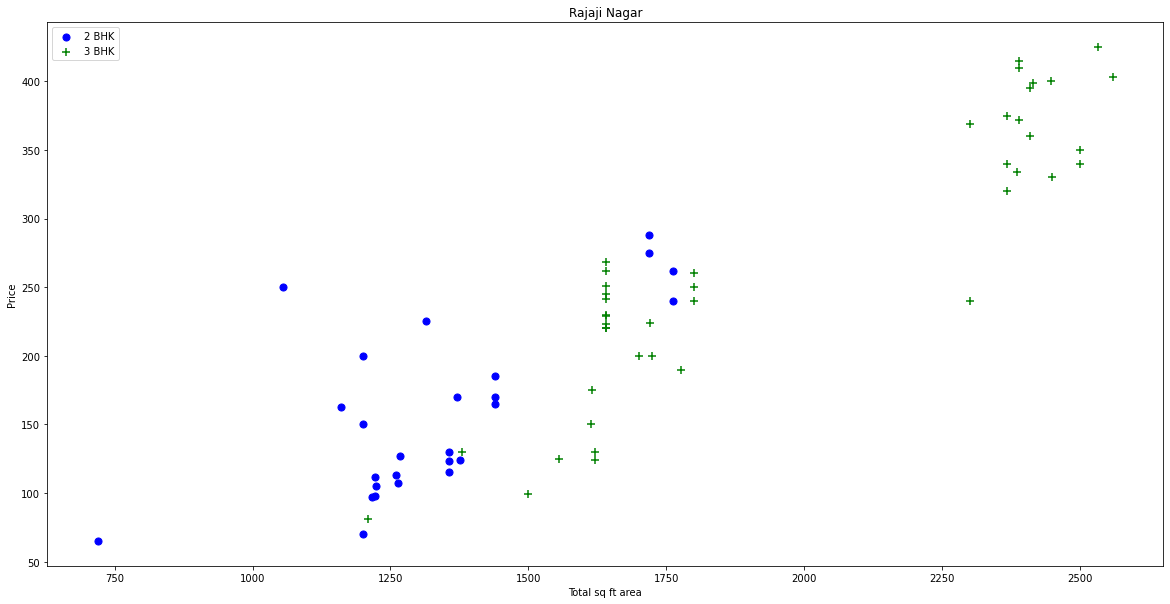

In [40]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3 BHK',s=50)
    plt.xlabel("Total sq ft area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df5,"Rajaji Nagar")

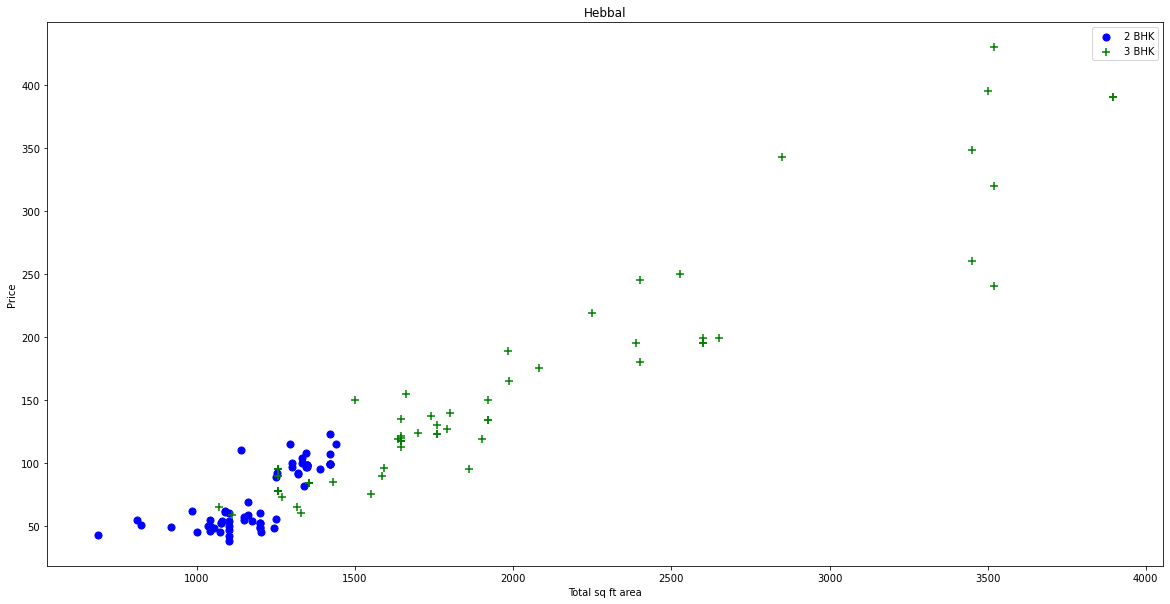

In [41]:
plot_scatter_chart(df5,"Hebbal")

We can see at some places price of 2HK is more than price of 3BHK for same area, they are outliers and needs to be considered

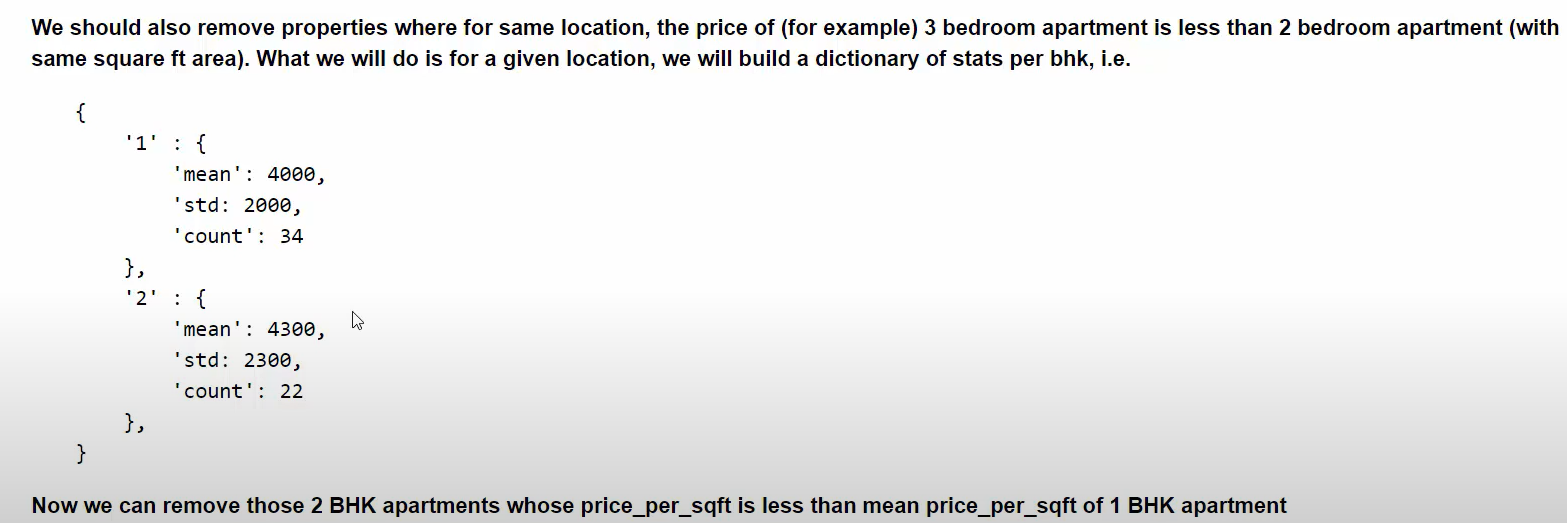

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')    

In [43]:
df6=remove_bhk_outliers(df5)

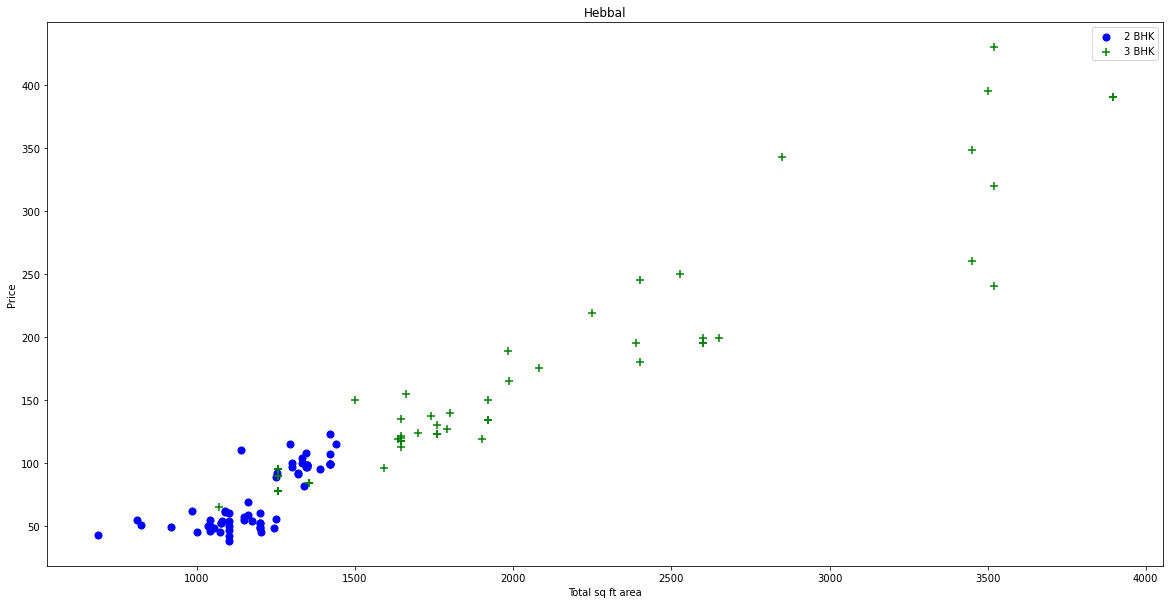

In [44]:
plot_scatter_chart(df6,"Hebbal")

# Plotting histogram to check how many properties are there as per sq ft area


Text(0, 0.5, 'Count')

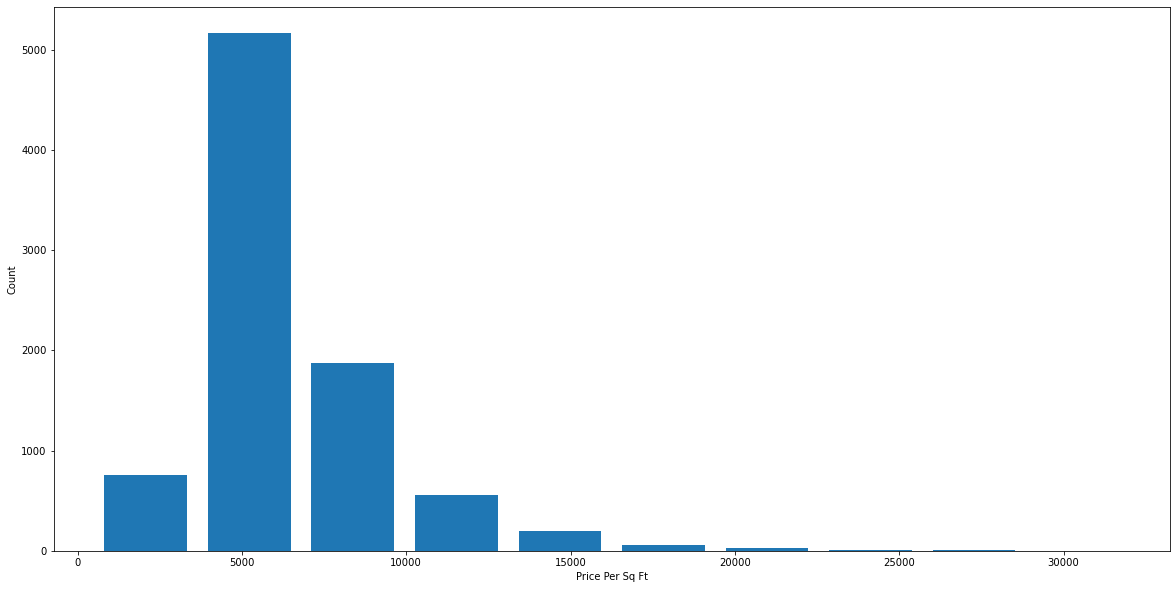

In [45]:
plt.hist(df6.price_per_sqft,rwidth=.8)
plt.xlabel("Price Per Sq Ft")
plt.ylabel("Count")

We can see out data set is of bell curve/normal curve type

In [46]:
# Lets check for bathrooms 
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  7.,  1.,  8.,  6.,  9., 10., 12., 16., 13.])

In [47]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6477,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
10280,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
10367,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
11101,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
11435,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


We have decided that if number of bathrooms > number of bedrooms+2,then it is an outlier

Text(0, 0.5, 'Count')

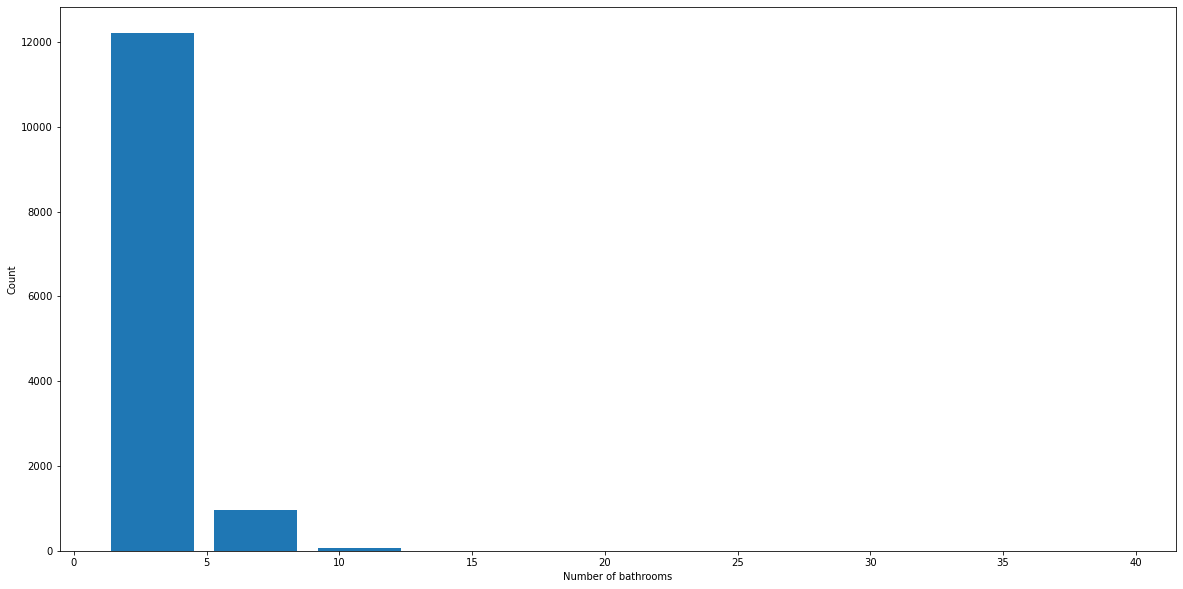

In [48]:
# now plot histogram for bathrooms count
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")


In [49]:
df6.shape

(8640, 7)

In [50]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1948,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6423,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7066,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5,22666.666667
8318,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
10208,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [51]:
df7=df6[df6.bath<df6.bhk+2]
df7.shape

(8534, 7)

In [52]:
# Dropping unnecessary features
#Considering size and price_per_sqft as unnecessary feature and dropping it
df8=df7.drop(['size','price_per_sqft'],axis='columns')
df8.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,2400.0,4.0,450.0,4
4,1st Block Jayanagar,1000.0,3.0,60.0,2


# Building Models

In [53]:
# Convert loaction column to numeric column as machine learninng model doesn't work on text column
# Use pandas dummies method
dummies =pd.get_dummies(df8.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur,other,south
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df9=pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')


In [55]:
df10=df9.drop('location',axis='columns')
df10.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,"Whietfield,",Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur,south
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df10.shape

(8534, 273)

In [57]:
# Training Features
X=df10.drop('price',axis='columns')
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,"Whietfield,",Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur,south
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000.0,3.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12022,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12023,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12026,3600.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12027,2400.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
#Test Features
y=df10.price
y

0        428.0
1        194.0
2        235.0
3        450.0
4         60.0
         ...  
12022    110.0
12023     26.0
12026    400.0
12027    480.0
12028    410.0
Name: price, Length: 8534, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

# Linear Regression Model

In [60]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)


LinearRegression()

In [61]:
# Tocalculate the accuracy of model
lr_clf.score(X_test,y_test)

0.7953143216206635

In [62]:
# K Fold Cross Validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)#n_split is indicating 5 fold cross validation

# ShuffleSplit will randomize the samples so that each fold have equal distribution of datasample,so that it is not targeted to one area

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 8.29328703e-01,  7.31458410e-01,  7.99443964e-01,  7.63534887e-01,
       -1.63401493e+16])

# GridSearch CV
# It is an API provided by sklearn which can run your model on different regressor, different parameters and can tel you the best score

In [63]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [64]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedma_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
            
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])   
find_best_model_using_gridsearchcv(X,y)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'friedma_mse'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tr

,model,best_score,best_params
0,linear_regression,-3.268030e+15,{'normalize': False}
1,lasso,6.415098e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,6.607200e-01,"{'criterion': 'mse', 'splitter': 'random'}"


In [65]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Whietfield,', 'Whitefield', 'Whitefield,', 'Yelachenahalli',
       'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yemlur, Old Airport Road,', 'Yeshwanthpur', 'south'],
      dtype='object', length=272)

In [66]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [67]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]

In [68]:
predict_price('1st Phase JP Nagar',100,2,2)

14.804505501472555

In [69]:
predict_price('1st Phase JP Nagar',100,2,3)

19.73227616381441

In [70]:
predict_price('1st Phase JP Nagar',100,3,3)

28.988299992180643

In [71]:
predict_price('Indira Nagar',100,2,2)

108.92641692088243

In [72]:
predict_price('Indira Nagar',100,3,3)

123.11021141159053

Export the model to pikle 

In [73]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [74]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))